 # <p style="background-color:purple;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Linear Regression</b></p>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 6)  # figure size'i fixlemek icin kullanilir
import warnings

warnings.filterwarnings('ignore')  # uyarilarin goz ardi edilmesi icin

# Read Data Set

In [2]:
df = pd.read_csv('/kaggle/input/slr-and-mlr-data/co2.csv')
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [3]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.tail()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7384,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.0,4,AS8,Z,12.2,8.7,10.7,26,248


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [6]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Fuel Consumption Comb (mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [8]:
def color_red_val(val):
    if val > 0.90 and val < 0.99:
        color = 'red'
    elif val >= 1:
        color = 'blue'
    else:
        color = 'white'
    return f' color:{color}'

In [9]:
pd.DataFrame(df).corr(numeric_only = True).style.applymap(color_red_val)

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.927653,0.831379,0.761526,0.817060,-0.757854,0.851145
Cylinders,0.927653,1.000000,0.800702,0.715252,0.780534,-0.719321,0.832644
Fuel Consumption City (L/100 km),0.831379,0.800702,1.000000,0.948180,0.993810,-0.927059,0.919592
Fuel Consumption Hwy (L/100 km),0.761526,0.715252,0.948180,1.000000,0.977299,-0.890638,0.883536
Fuel Consumption Comb (L/100 km),0.817060,0.780534,0.993810,0.977299,1.000000,-0.925576,0.918052
Fuel Consumption Comb (mpg),-0.757854,-0.719321,-0.927059,-0.890638,-0.925576,1.000000,-0.907426
CO2 Emissions(g/km),0.851145,0.832644,0.919592,0.883536,0.918052,-0.907426,1.000000


# Simple Linear Regression

In [10]:
X = df['Engine Size(L)']
y = df['CO2 Emissions(g/km)']

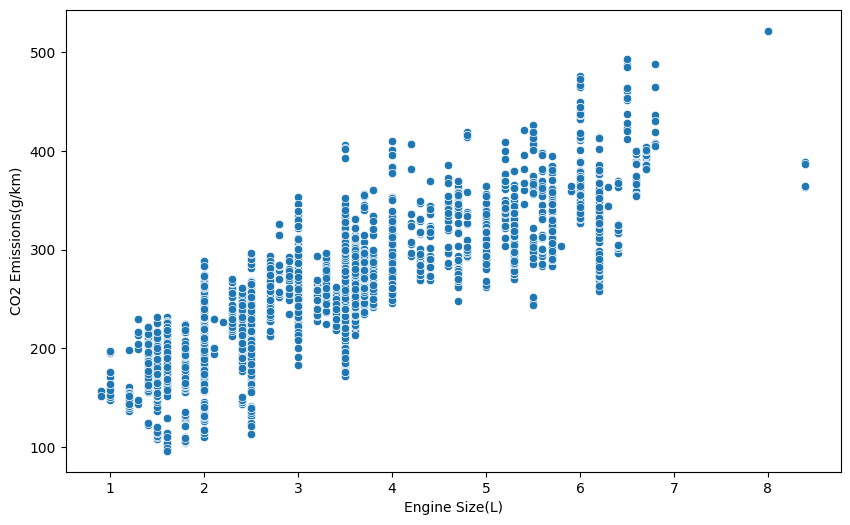

In [11]:
sns.scatterplot(x = 'Engine Size(L)', y = 'CO2 Emissions(g/km)', data = df);

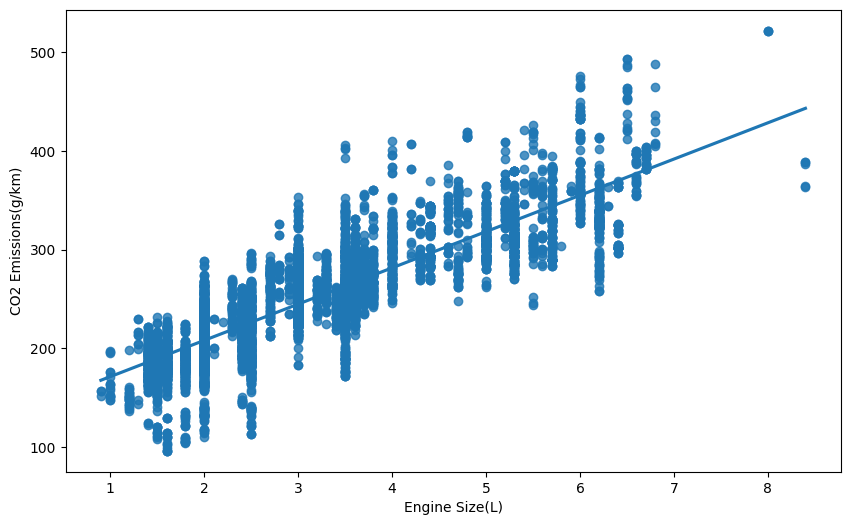

In [12]:
sns.regplot(x = 'Engine Size(L)', y = 'CO2 Emissions(g/km)', data=df, ci = None);

In [13]:
np.polyfit(X, y, deg=1) 

array([ 36.77731519, 134.36589272])

In [14]:
slope, intercept = np.polyfit(X, y, deg=1)

In [15]:
print("slope       :", slope)
print("intercept   :", intercept)

slope       : 36.77731518641954
intercept   : 134.365892723495


In [16]:
b1, b0 = np.polyfit(X, y, deg = 1)

In [17]:
print("b1 :", b1)
print("b0 :", b0)

b1 : 36.77731518641954
b0 : 134.365892723495


In [18]:
y_pred = b1*X + b0

In [19]:
y_pred

0       207.920523
1       222.631449
2       189.531866
3       263.086496
4       263.086496
           ...    
7380    207.920523
7381    207.920523
7382    207.920523
7383    207.920523
7384    207.920523
Name: Engine Size(L), Length: 7385, dtype: float64

In [20]:
values = {"actual": y, "predicted": y_pred, "residual": y - y_pred, "LSE": (y - y_pred)**2}
df_2 = pd.DataFrame(values)
df_2

,actual,predicted,residual,LSE
0,196,207.920523,-11.920523,142.098871
1,221,222.631449,-1.631449,2.661626
2,136,189.531866,-53.531866,2865.660624
3,255,263.086496,-8.086496,65.391416
4,244,263.086496,-19.086496,364.294325
...,...,...,...,...
7380,219,207.920523,11.079477,122.754808
7381,232,207.920523,24.079477,579.821208
7382,240,207.920523,32.079477,1029.092838
7383,232,207.920523,24.079477,579.821208


In [21]:
df_2.LSE.sum()

6966208.685372684

In [22]:
potential_engine = np.linspace(0,1,100)  
potential_engine

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [23]:
predicted_co2_lin = b1*potential_engine + b0
predicted_co2_lin

array([134.36589272, 134.73738076, 135.10886879, 135.48035682,
       135.85184485, 136.22333288, 136.59482092, 136.96630895,
       137.33779698, 137.70928501, 138.08077305, 138.45226108,
       138.82374911, 139.19523714, 139.56672517, 139.93821321,
       140.30970124, 140.68118927, 141.0526773 , 141.42416534,
       141.79565337, 142.1671414 , 142.53862943, 142.91011746,
       143.2816055 , 143.65309353, 144.02458156, 144.39606959,
       144.76755762, 145.13904566, 145.51053369, 145.88202172,
       146.25350975, 146.62499779, 146.99648582, 147.36797385,
       147.73946188, 148.11094991, 148.48243795, 148.85392598,
       149.22541401, 149.59690204, 149.96839008, 150.33987811,
       150.71136614, 151.08285417, 151.4543422 , 151.82583024,
       152.19731827, 152.5688063 , 152.94029433, 153.31178236,
       153.6832704 , 154.05475843, 154.42624646, 154.79773449,
       155.16922253, 155.54071056, 155.91219859, 156.28368662,
       156.65517465, 157.02666269, 157.39815072, 157.76

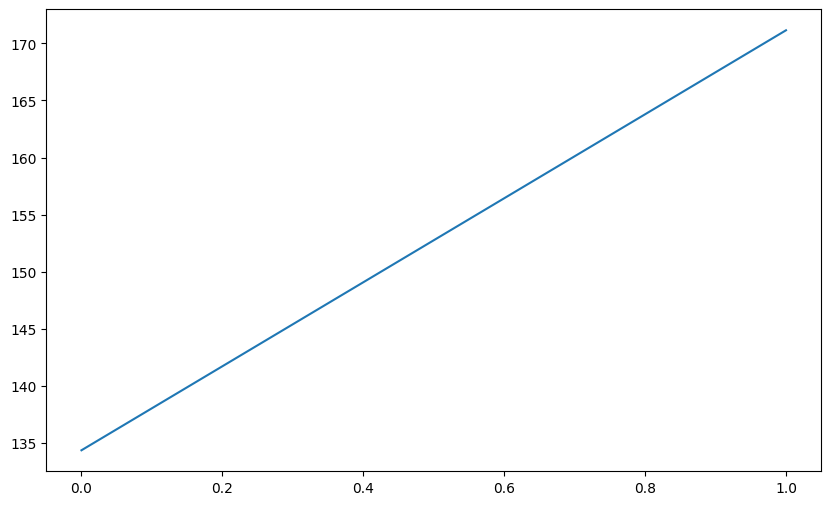

In [24]:
plt.plot(potential_engine, predicted_co2_lin)

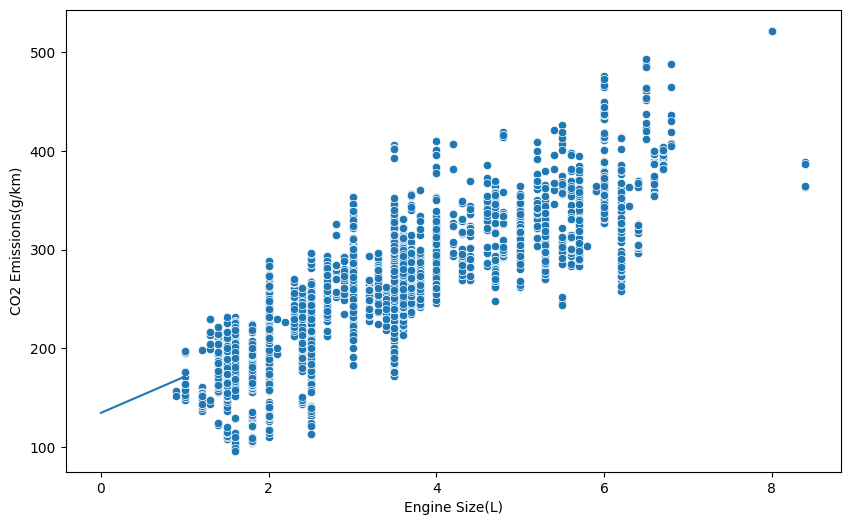

In [25]:
plt.plot(potential_engine, predicted_co2_lin)
sns.scatterplot(x="Engine Size(L)", y ="CO2 Emissions(g/km)",data=df);

In [26]:
a = np.polyfit(X, y, deg=3)
a

array([ 0.5532652 , -8.69737899, 76.04439217, 84.89105185])

In [27]:
a1 = np.polyfit(X, y, deg=3)[0]   # x^3 teriminin katsayısı
a2 = np.polyfit(X, y, deg=3)[1]   # x^2 teriminin katsayısı
a3 = np.polyfit(X, y, deg=3)[2]   # x teriminin katsayısı
a0 = np.polyfit(X, y, deg=3)[3]   # sabit terim

In [28]:
predicted_co2_poly = a1*potential_engine**3 + a2*potential_engine**2+a3*potential_engine + a0
predicted_co2_poly

array([ 84.89105185,  85.65829019,  86.42375717,  87.18745619,
        87.94939068,  88.70956406,  89.46797976,  90.22464118,
        90.97955176,  91.73271492,  92.48413407,  93.23381264,
        93.98175405,  94.72796172,  95.47243907,  96.21518953,
        96.95621651,  97.69552343,  98.43311372,  99.1689908 ,
        99.90315808, 100.635619  , 101.36637696, 102.0954354 ,
       102.82279773, 103.54846738, 104.27244776, 104.9947423 ,
       105.71535442, 106.43428754, 107.15154508, 107.86713046,
       108.5810471 , 109.29329843, 110.00388786, 110.71281882,
       111.42009473, 112.12571901, 112.82969508, 113.53202636,
       114.23271627, 114.93176824, 115.62918568, 116.32497201,
       117.01913067, 117.71166506, 118.40257862, 119.09187475,
       119.77955689, 120.46562845, 121.15009286, 121.83295353,
       122.51421389, 123.19387736, 123.87194735, 124.5484273 ,
       125.22332062, 125.89663073, 126.56836106, 127.23851503,
       127.90709605, 128.57410755, 129.23955294, 129.90

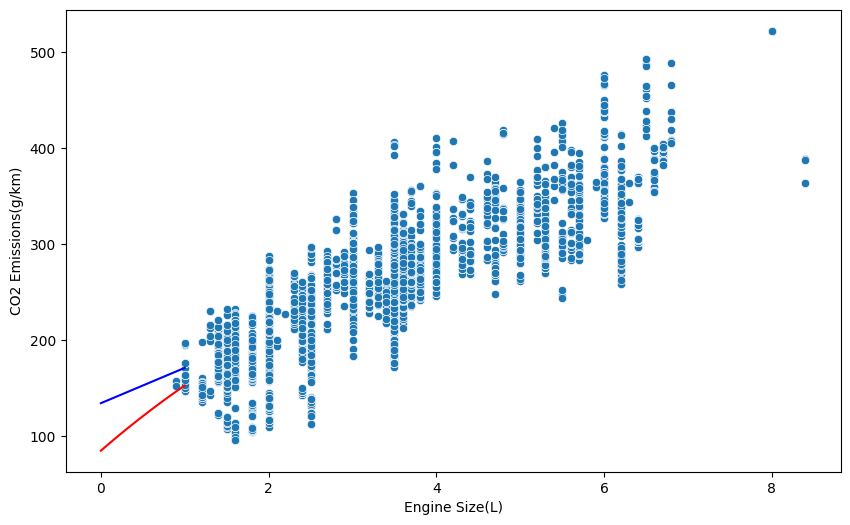

In [29]:
plt.plot(potential_engine, predicted_co2_poly, color = "red");
plt.plot(potential_engine, predicted_co2_lin, color ='blue');
sns.scatterplot(x="Engine Size(L)", y ="CO2 Emissions(g/km)",data=df);

In [30]:
z = np.polyfit(X, y, deg = 10)
z

array([-2.58821226e-03,  1.20187357e-01, -2.43202503e+00,  2.80824345e+01,
       -2.03684216e+02,  9.63599334e+02, -2.99207280e+03,  5.98239288e+03,
       -7.32608476e+03,  4.98209626e+03, -1.27036520e+03])

In [31]:
z1 = np.polyfit(X, y, deg = 10)[0]
z2 = np.polyfit(X, y, deg = 10)[1]
z3 = np.polyfit(X, y, deg = 10)[2]
z4 = np.polyfit(X, y, deg = 10)[3]
z5 = np.polyfit(X, y, deg = 10)[4]
z6 = np.polyfit(X, y, deg = 10)[5]
z7 = np.polyfit(X, y, deg = 10)[6]
z8 = np.polyfit(X, y, deg = 10)[7]
z9 = np.polyfit(X, y, deg = 10)[8]
z10= np.polyfit(X, y, deg = 10)[9]
z0 = np.polyfit(X, y, deg = 10)[10]

In [32]:
pred_lin = b1 * X + b0
pred_poly = z1 * X **10 + z2 * X **9 + z3 * X **8 + z4 * X **7 + z5 * X **6 + z6 * X **5 +z7 * X **4 + z8 * X **3 + z9 * X **2+ z10 * X + z0

print(pred_lin, pred_poly)

0       207.920523
1       222.631449
2       189.531866
3       263.086496
4       263.086496
           ...    
7380    207.920523
7381    207.920523
7382    207.920523
7383    207.920523
7384    207.920523
Name: Engine Size(L), Length: 7385, dtype: float64 0       205.694138
1       226.325002
2       181.493537
3       267.256741
4       267.256741
           ...    
7380    205.694138
7381    205.694138
7382    205.694138
7383    205.694138
7384    205.694138
Name: Engine Size(L), Length: 7385, dtype: float64


In [33]:
values = {"actual": y, "predicted":pred_poly, "resudial": y - pred_poly, "LSE" : (y - pred_poly)**2}
df_pol = pd.DataFrame(values)
df_pol

,actual,predicted,resudial,LSE
0,196,205.694138,-9.694138,93.976309
1,221,226.325002,-5.325002,28.355647
2,136,181.493537,-45.493537,2069.661886
3,255,267.256741,-12.256741,150.227697
4,244,267.256741,-23.256741,540.875996
...,...,...,...,...
7380,219,205.694138,13.305862,177.045967
7381,232,205.694138,26.305862,691.998382
7382,240,205.694138,34.305862,1176.892176
7383,232,205.694138,26.305862,691.998382


In [34]:
df_pol.LSE.sum()

6664758.76103558

In [35]:
# lineerdeki sonucları hatırlayalım
values_lin = {"actual": y, "predicted":pred_lin, "resudial": y - pred_lin, "LSE" : (y - pred_lin)**2}
df_lin = pd.DataFrame(values_lin)
df_lin

,actual,predicted,resudial,LSE
0,196,207.920523,-11.920523,142.098871
1,221,222.631449,-1.631449,2.661626
2,136,189.531866,-53.531866,2865.660624
3,255,263.086496,-8.086496,65.391416
4,244,263.086496,-19.086496,364.294325
...,...,...,...,...
7380,219,207.920523,11.079477,122.754808
7381,232,207.920523,24.079477,579.821208
7382,240,207.920523,32.079477,1029.092838
7383,232,207.920523,24.079477,579.821208


In [36]:
df_lin.LSE.sum()

6966208.685372684

# Multi-Linear Regression

In [37]:
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [38]:
X = df[['Engine Size(L)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption City (L/100 km)']]
y = df['CO2 Emissions(g/km)']

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [41]:
X_train

,Engine Size(L),Fuel Consumption Comb (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption City (L/100 km)
6130,2.2,8.4,7.9,8.9
7188,3.0,11.6,10.1,12.7
6304,3.0,9.4,8.0,10.6
6017,3.6,11.8,10.4,12.8
2348,4.4,13.8,11.4,15.7
...,...,...,...,...
5191,2.0,9.0,7.4,10.3
5226,3.5,9.1,7.3,10.6
5390,3.5,10.4,8.8,11.7
860,2.5,8.6,7.4,9.5


In [42]:
y_train

6130    227
7188    271
6304    221
6017    274
2348    322
       ... 
5191    210
5226    214
5390    242
860     198
7270    279
Name: CO2 Emissions(g/km), Length: 5169, dtype: int64

In [43]:
print("X Train features shape: {}\ny Train features shape: {}\nX Test features shape : {}\nY Test features shape : {}".format
      (X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X Train features shape: (5169, 4)
y Train features shape: (5169,)
X Test features shape : (2216, 4)
Y Test features shape : (2216,)


In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
lm = LinearRegression()

In [46]:
lm.fit(X_train, y_train)

LinearRegression()

In [47]:
y_pred =lm.predict(X_test)
y_pred

array([247.49314135, 318.24250605, 330.531149  , ..., 203.35582624,
       217.08713403, 322.16751909])

In [48]:
lm.coef_

array([12.63210709, 10.20241882,  0.44286467,  2.68240309])

In [49]:
lm.intercept_

61.142874656596604

In [50]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual":y_test - y_pred}

In [51]:
comparing = pd.DataFrame(my_dict)
comparing

,Actual,pred,residual
7261,253,247.493141,5.506859
4489,344,318.242506,25.757494
1539,322,330.531149,-8.531149
3532,297,301.388352,-4.388352
6418,308,289.971685,18.028315
...,...,...,...
5123,313,293.635087,19.364913
5359,193,205.449620,-12.449620
7294,200,203.355826,-3.355826
2569,224,217.087134,6.912866


In [52]:
results_sample = comparing.head(25)
results_sample

,Actual,pred,residual
7261,253,247.493141,5.506859
4489,344,318.242506,25.757494
1539,322,330.531149,-8.531149
3532,297,301.388352,-4.388352
6418,308,289.971685,18.028315
3703,406,342.960412,63.039588
5976,242,240.829298,1.170702
4332,216,212.685207,3.314793
5015,246,233.551606,12.448394
2087,223,224.824529,-1.824529


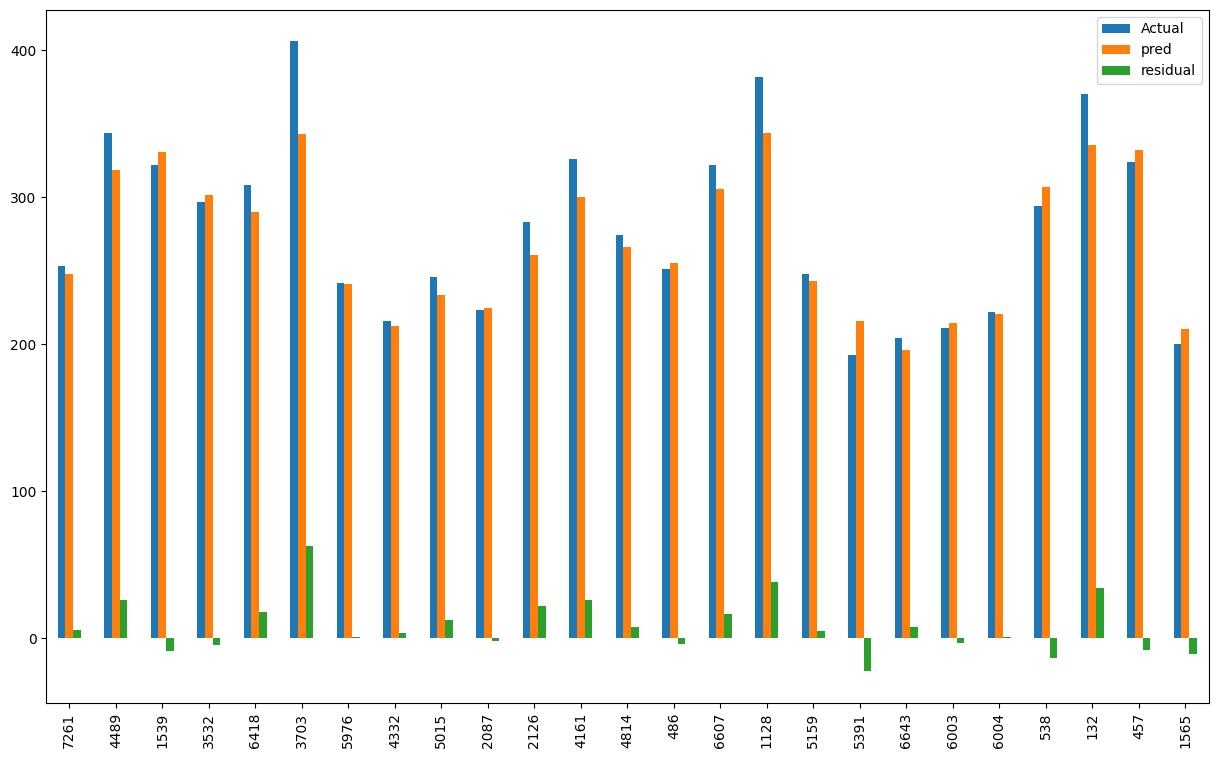

In [53]:
results_sample.plot(kind= "bar", figsize = (15,9))
plt.show()

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# performans degerlendirme icin error metrikleri
# RMSE metrigini manuel hesaplayacagiz

In [55]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance: ")
    print("---------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [56]:
eval_metric(y_test, y_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.8696343237869403
MAE 		: 13.480594300830521
MSE 		: 440.3368664459096
RMSE 		: 20.98420516593158


In [57]:
# X_train degerlerini prediction yapacağız
y_train_pred = lm.predict(X_train)

In [58]:
eval_metric(y_train, y_train_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.8753401034629794
MAE 		: 13.398753941235892
MSE 		: 429.04430414898457
RMSE 		: 20.713384661831213


In [59]:
residuals = y_test - y_pred

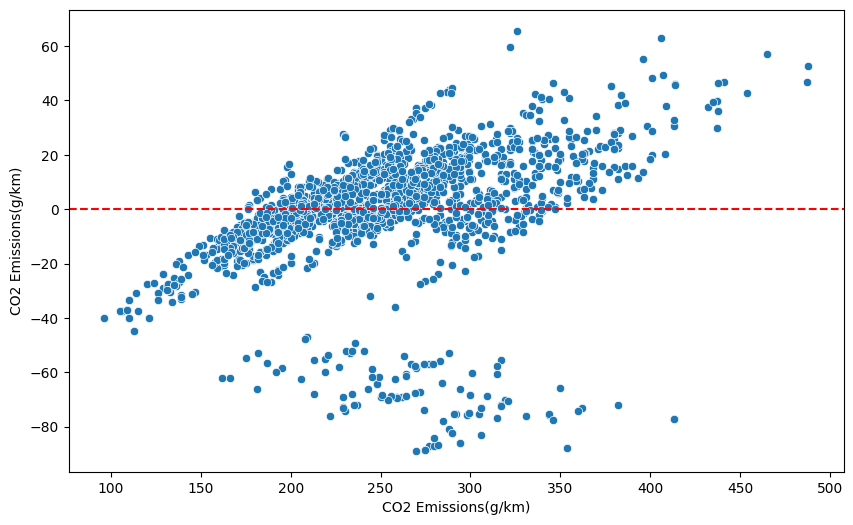

In [60]:
plt.figure(figsize=(10,6))

sns.scatterplot(x= y_test, y=residuals)

plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [61]:
from scipy import stats

((array([-3.42031516, -3.17117209, -3.03309047, ...,  3.03309047,
          3.17117209,  3.42031516]),
  array([-88.88802643, -88.78214777, -88.78214777, ...,  59.62244958,
          63.03958774,  65.66763124])),
 (19.43567545518011, -0.44889165970313183, 0.9251405128702843))

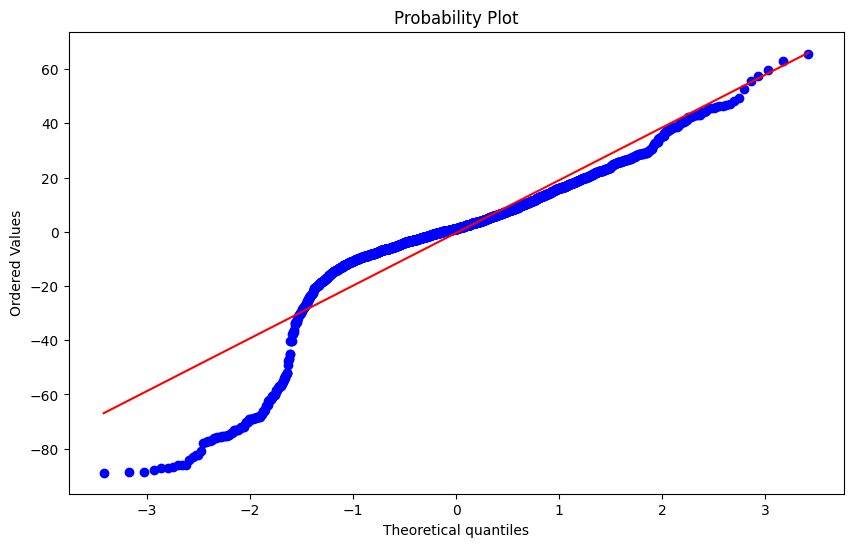

In [62]:
stats.probplot(residuals, dist='norm', plot = plt)

In [63]:
from yellowbrick.regressor import ResidualsPlot

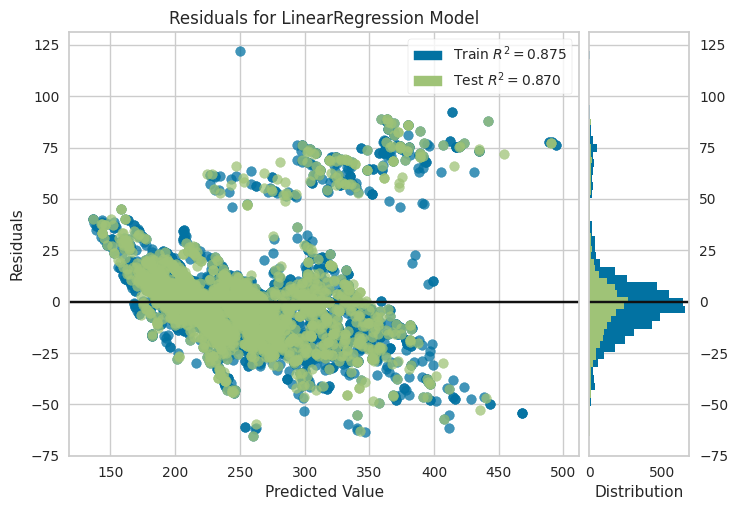

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [64]:
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

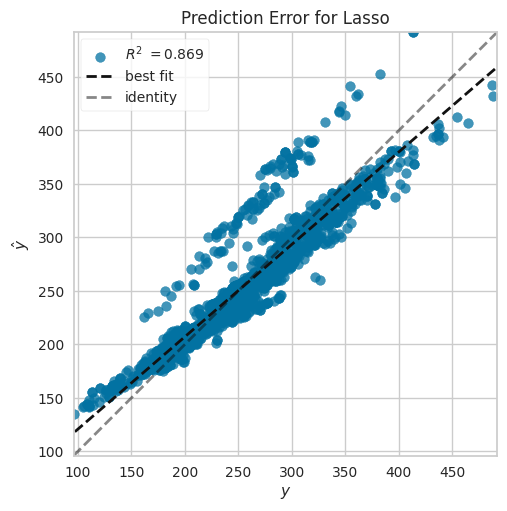

<Axes: title={'center': 'Prediction Error for Lasso'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [65]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError

model = Lasso()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

## Multi-Polynomial

In [66]:
from sklearn.preprocessing import PolynomialFeatures

In [67]:
poly_conv = PolynomialFeatures(degree=4, include_bias=False)

In [68]:
poly_conv.fit(X)

PolynomialFeatures(degree=4, include_bias=False)

In [69]:
poly_features = poly_conv.transform(X)   # polymomial feature lar urettik
poly_features

array([[2.00000000e+00, 8.50000000e+00, 6.70000000e+00, ...,
        4.39966890e+03, 6.50100330e+03, 9.60596010e+03],
       [2.40000000e+00, 9.60000000e+00, 7.70000000e+00, ...,
        7.43733760e+03, 1.08179456e+04, 1.57351936e+04],
       [1.50000000e+00, 5.90000000e+00, 5.80000000e+00, ...,
        1.21104000e+03, 1.25280000e+03, 1.29600000e+03],
       ...,
       [2.00000000e+00, 1.03000000e+01, 8.60000000e+00, ...,
        1.01243844e+04, 1.37738718e+04, 1.87388721e+04],
       [2.00000000e+00, 9.90000000e+00, 8.30000000e+00, ...,
        8.64156160e+03, 1.16609024e+04, 1.57351936e+04],
       [2.00000000e+00, 1.07000000e+01, 8.70000000e+00, ...,
        1.12656996e+04, 1.57978776e+04, 2.21533456e+04]])

In [70]:
poly_features.shape 

(7385, 69)

In [71]:
X.shape

(7385, 4)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)


In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
model_poly = LinearRegression()

In [75]:
model_poly.fit(X_train, y_train)

LinearRegression()

In [76]:
y_pred = model_poly.predict(X_test)

In [77]:
my_dict = {"Actual":y_test, "pred":y_pred, "residual": y_test - y_pred }
compare = pd.DataFrame(my_dict)
compare.head(20)

,Actual,pred,residual
7261,253,256.794138,-3.794138
4489,344,319.325821,24.674179
1539,322,326.543037,-4.543037
3532,297,294.384018,2.615982
6418,308,310.955277,-2.955277
3703,406,338.311240,67.688760
5976,242,245.485945,-3.485945
4332,216,217.899681,-1.899681
5015,246,250.088839,-4.088839
2087,223,230.203698,-7.203698


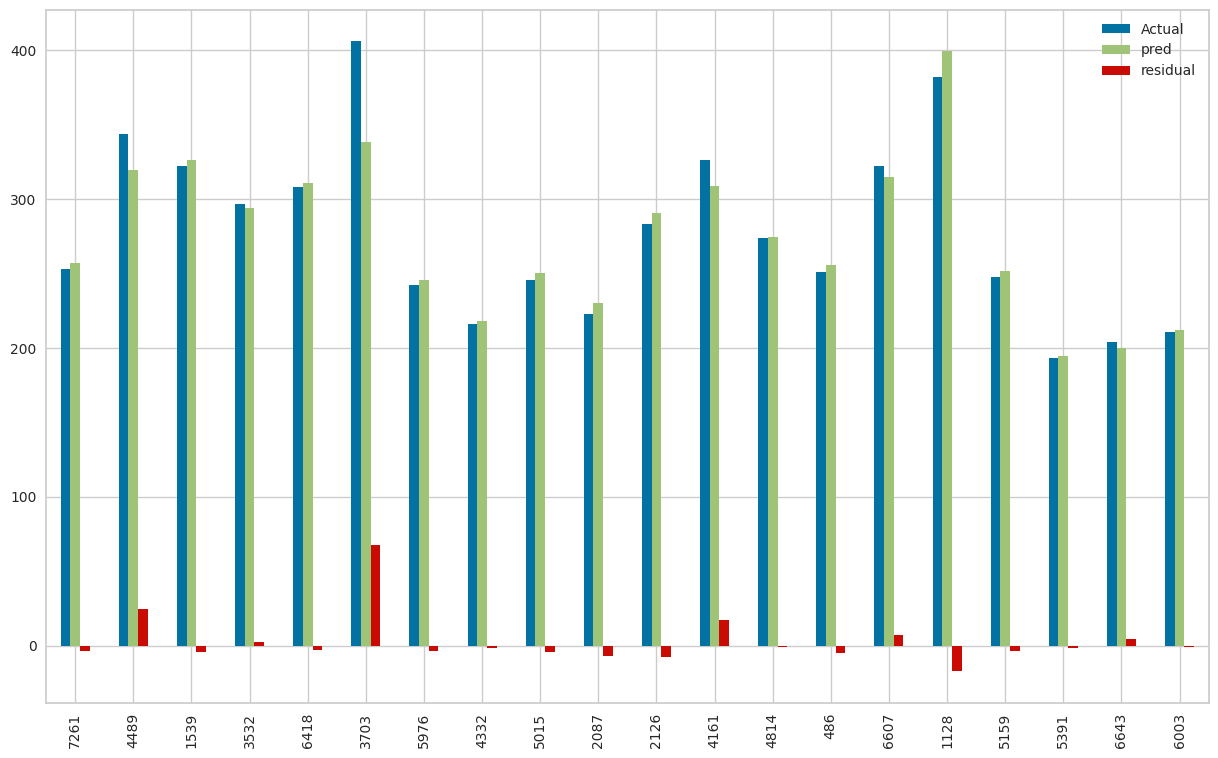

In [78]:
compare.head(20).plot(kind ="bar", figsize =(15,9))
plt.show();

In [79]:
model_poly.coef_

array([-1.36481233e+01,  8.26971520e+02, -5.30438944e+02, -4.18118287e+02,
        2.50777656e+01, -3.92495968e+02,  1.90328579e+02,  1.93758939e+02,
        1.38932758e+03, -1.52167999e+03, -1.43536260e+03,  4.27847144e+02,
        7.92919801e+02,  3.71432330e+02,  1.11123173e+01, -1.51042532e+02,
        6.62532804e+01,  7.05976104e+01,  1.56946951e+03, -1.44105346e+03,
       -1.56090495e+03,  3.38402612e+02,  7.05167720e+02,  3.93755019e+02,
        7.00767829e+03, -1.03841886e+04, -1.13351671e+04,  5.04998677e+03,
        1.13245247e+04,  6.04179162e+03, -8.06954442e+02, -2.78790751e+03,
       -3.04870171e+03, -1.06309072e+03,  7.56120611e-01,  3.01962127e+00,
       -1.81377440e+00, -2.92344614e+00, -1.40202961e+02,  1.42398293e+02,
        1.50938642e+02, -3.58682987e+01, -7.61362392e+01, -3.98960578e+01,
        1.13359217e+03, -1.52660647e+03, -1.90237999e+03,  7.08303938e+02,
        1.66860002e+03,  1.07253914e+03, -1.13605582e+02, -3.77268607e+02,
       -4.60218250e+02, -

In [80]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [81]:
y_pred = model_poly.predict(X_test) #X_test ile testimi yapıyorum

In [82]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [83]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9356164151339722
MAE 		: 7.43543211034566
MSE 		: 217.46879112663905
RMSE 		: 14.746823085893418


In [84]:
y_train_pred = model_poly.predict(X_train)   

In [85]:
 eval_metric(y_train, y_train_pred)   

Model testing performance:
--------------------------
R2_score 	: 0.9442114196338728
MAE 		: 6.897776983736152
MSE 		: 192.00860346885082
RMSE 		: 13.856716908014352


In [86]:
def poly(d):   # degree derecesi içine ne yazarsam ona göre çözüm oluşturacak
    
    train_rmse_errors = []   # trains rmse değerlerin toplayacak
    test_rmse_errors = []    # test rmse değerlerin toplayacak
    number_of_features = []  # derece arttıkça feature sayısının kaça çıktığnı göreceğiz
    
    for i in range(1, d):  # 1 den kaçıncı dereceye kadar istiyorsak ona göre yazacağız
        polynomial_converter = PolynomialFeatures(degree = i, include_bias =False)
        poly_features = polynomial_converter.fit_transform(X)
        
        X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
        
        model = LinearRegression(fit_intercept=True) 
        model.fit(X_train, y_train)
        
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        
        train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
        test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
        
        train_rmse_errors.append(train_RMSE)
        test_rmse_errors.append(test_RMSE)
        
        number_of_features.append(poly_features.shape[1])
        
    return pd.DataFrame({"train_rmse_errors": train_rmse_errors, "test_rmse_errors":test_rmse_errors, "number of features":number_of_features}, 
                        index=range(1,d))

In [87]:
poly(10)

,train_rmse_errors,test_rmse_errors,number of features
1,20.855262,20.665769,4
2,16.661711,16.560362,14
3,15.820798,15.626022,34
4,14.199758,14.116195,69
5,13.517680,15.302817,125
6,12.263031,28.816062,209
7,11.062876,121.709102,329
8,11.930357,174.156209,494
9,31.425099,734.006429,714


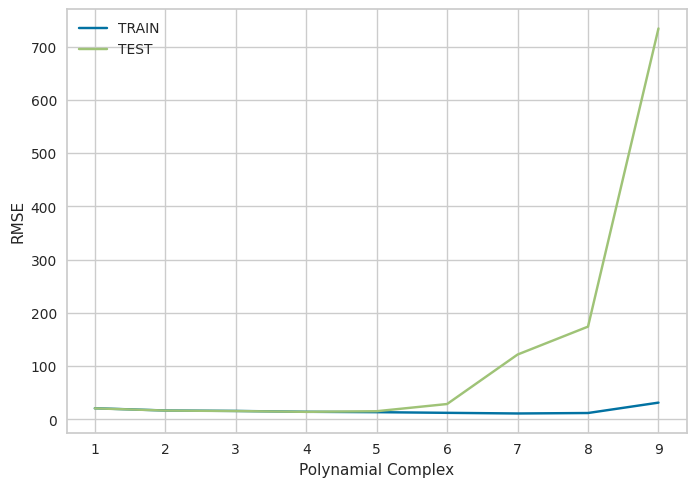

In [88]:
# yukardakş sonucların grafigini çizelim ve patlama noktasını görelim

plt.plot(range(1,10), poly(10)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,10), poly(10)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynamial Complex")
plt.ylabel("RMSE")
plt.legend();
plt.show()

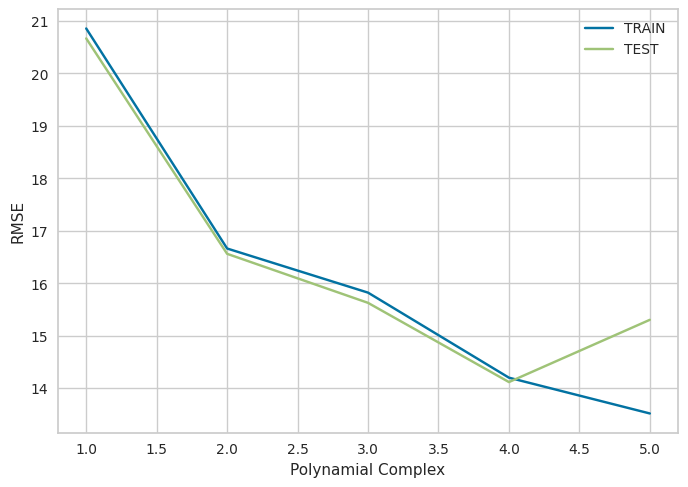

In [89]:
# grafige daha yaakından bakalım

plt.plot(range(1,6), poly(6)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,6), poly(6)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynamial Complex")
plt.ylabel("RMSE")
plt.legend();
plt.show()

# Scale

In [90]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def train_val(y_train, y_train_pred, y_test, y_pred, i):
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    return pd.DataFrame(scores)

In [91]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [92]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [93]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[-0.71235412, -0.89706537, -0.52119825, ..., -0.53105059,
        -0.55890106, -0.57332773],
       [-0.12513485,  0.2083558 ,  0.47101105, ..., -0.10280261,
        -0.17113119, -0.23000964],
       [-0.12513485, -0.55162125, -0.47609783, ..., -0.44742492,
        -0.45736725, -0.46288038],
       ...,
       [ 0.2418772 , -0.20617714, -0.11529444, ..., -0.32055742,
        -0.34026066, -0.3565452 ],
       [-0.49214689, -0.82797655, -0.74670036, ..., -0.53110291,
        -0.53901631, -0.5407905 ],
       [ 0.60888924,  0.31198903,  0.47101105, ..., -0.03345799,
        -0.0784685 , -0.12170524]])

In [94]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.12513485, -0.03345508, -0.0250936 , ..., -0.25158207,
        -0.26164133, -0.27126864],
       [ 0.90249888,  1.27923255,  1.14751739, ...,  0.7834548 ,
         0.83867019,  0.87541316],
       [ 2.22374224,  1.03742167,  1.05731654, ...,  0.53842313,
         0.51843695,  0.48610353],
       ...,
       [-0.85915894, -0.82797655, -0.83690121, ..., -0.53350147,
        -0.53320286, -0.52847945],
       [-0.85915894, -0.48253243, -0.52119825, ..., -0.43909443,
        -0.43934753, -0.43694842],
       [ 1.12270611,  1.27923255,  1.01221612, ...,  0.72343756,
         0.82500421,  0.91174658]])

In [95]:
pd.DataFrame(X_train_scaled).agg(['mean', 'std']).round()

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
mean,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,...,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [96]:
pd.DataFrame(X_test_scaled).agg(['mean', 'std']).round()

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
mean,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [97]:
normscaler = MinMaxScaler()
normscaler.fit(X_train)

MinMaxScaler()

In [98]:
norm_scaler = normscaler.transform(X_train)
norm_scaler

array([[0.17333333, 0.19545455, 0.23493976, ..., 0.01173909, 0.00893792,
        0.00680358],
       [0.28      , 0.34090909, 0.36746988, ..., 0.04072555, 0.03456632,
        0.0293263 ],
       [0.28      , 0.24090909, 0.24096386, ..., 0.01739939, 0.01564847,
        0.01404926],
       ...,
       [0.34666667, 0.28636364, 0.28915663, ..., 0.02598656, 0.02338825,
        0.02102518],
       [0.21333333, 0.20454545, 0.20481928, ..., 0.01173554, 0.01025214,
        0.00893812],
       [0.41333333, 0.35454545, 0.36746988, ..., 0.04541922, 0.04069056,
        0.0364314 ]])

In [99]:
norm_scaler = normscaler.transform(X_test)
norm_scaler

array([[0.28      , 0.30909091, 0.30120482, ..., 0.03065524, 0.02858435,
        0.02661958],
       [0.46666667, 0.48181818, 0.45783133, ..., 0.1007129 , 0.1013059 ,
        0.10184543],
       [0.70666667, 0.45      , 0.44578313, ..., 0.08412765, 0.08014111,
        0.07630552],
       ...,
       [0.14666667, 0.20454545, 0.19277108, ..., 0.01157319, 0.01063636,
        0.00974576],
       [0.14666667, 0.25      , 0.23493976, ..., 0.01796324, 0.01683942,
        0.01575048],
       [0.50666667, 0.48181818, 0.43975904, ..., 0.09665057, 0.10040269,
        0.10422902]])

In [100]:
pd.DataFrame(norm_scaler).agg(['mean', 'std']).round()

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Burda hem standardizasyon hem de normalizasyon yaptik burdan cikan sonucta bu data setinin standardizasyona daha uygun oldugu ortaya cikti.

In [101]:
from sklearn.linear_model import LinearRegression

In [102]:
lm = LinearRegression()

In [103]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [104]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

In [105]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, i): 
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [106]:
ls = train_val(y_train, y_train_pred, y_test, y_pred, "linear") 
ls 

,linear_train,linear_test
R2,0.944211,0.935616
mae,6.897777,7.435432
mse,192.008604,217.468791
rmse,13.856717,14.746823


# CV

In [107]:
from sklearn.model_selection import cross_validate, cross_val_score

In [108]:
import sklearn.metrics
print(dir(sklearn.metrics))

['ConfusionMatrixDisplay', 'DetCurveDisplay', 'DistanceMetric', 'PrecisionRecallDisplay', 'PredictionErrorDisplay', 'RocCurveDisplay', 'SCORERS', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_base', '_classification', '_dist_metrics', '_pairwise_distances_reduction', '_pairwise_fast', '_plot', '_ranking', '_regression', '_scorer', 'accuracy_score', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'auc', 'average_precision_score', 'balanced_accuracy_score', 'brier_score_loss', 'calinski_harabasz_score', 'check_scoring', 'class_likelihood_ratios', 'classification_report', 'cluster', 'cohen_kappa_score', 'completeness_score', 'confusion_matrix', 'consensus_score', 'coverage_error', 'd2_absolute_error_score', 'd2_pinball_score', 'd2_tweedie_score', 'davies_bouldin_score', 'dcg_score', 'det_curve', 'euclidean_distances', 'explained_variance_score', 'f1_score', 'fbeta_score', 'fowlkes_mallows_score', 'ge

In [109]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['r2',
                                                                   'neg_mean_absolute_error', 
                                                                   'neg_mean_squared_error',
                                                                   'neg_root_mean_squared_error'], cv= 5)

In [110]:
pd.DataFrame(scores, index=range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.018507,0.019710,0.940801,-7.075743,-205.084312,-14.320765
2,0.055459,0.005536,0.948829,-6.550457,-166.130553,-12.889164
3,0.056247,0.005132,0.914177,-7.978223,-285.093782,-16.884720
4,0.053129,0.005036,0.956569,-6.653995,-155.471088,-12.468805
5,0.055340,0.005182,0.934315,-7.457651,-235.197148,-15.336139


In [111]:
scores = pd.DataFrame(scores, index = range(1,6))
scores.iloc[:, 2:].mean()

test_r2                               0.938938
test_neg_mean_absolute_error         -7.143214
test_neg_mean_squared_error        -209.395376
test_neg_root_mean_squared_error    -14.379919
dtype: float64

In [112]:
ls = train_val(y_train, y_train_pred, y_test, y_pred, 'linear')
ls

,linear_train,linear_test
R2,0.944211,0.935616
mae,6.897777,7.435432
mse,192.008604,217.468791
rmse,13.856717,14.746823


In [113]:
cv_df = pd.DataFrame(scores, index=range(1, 6)).add_prefix("cv_")
cv_df

,cv_fit_time,cv_score_time,cv_test_r2,cv_test_neg_mean_absolute_error,cv_test_neg_mean_squared_error,cv_test_neg_root_mean_squared_error
1,0.018507,0.019710,0.940801,-7.075743,-205.084312,-14.320765
2,0.055459,0.005536,0.948829,-6.550457,-166.130553,-12.889164
3,0.056247,0.005132,0.914177,-7.978223,-285.093782,-16.884720
4,0.053129,0.005036,0.956569,-6.653995,-155.471088,-12.468805
5,0.055340,0.005182,0.934315,-7.457651,-235.197148,-15.336139


In [114]:
scores = pd.DataFrame(scores, index= range(1, 6))
scores.columns = [f'cv_{col}' for col in scores.columns] 

In [115]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df

,lm_coef
0,-1.859356e+01
1,2.393937e+03
2,-1.176129e+03
3,-1.468246e+03
4,2.595150e+02
...,...
64,6.940802e+05
65,1.267393e+06
66,-3.625542e+06
67,-7.970261e+06


# Regularization

## Ridge Regression

In [116]:
from sklearn.linear_model import Ridge

In [117]:
ridge_model = Ridge(alpha = 1.0, random_state = 42)

In [118]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(random_state=42)

In [119]:
y_pred = ridge_model.predict(X_test_scaled)

y_train_pred = ridge_model.predict(X_train_scaled)

In [120]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, 'ridge')
rs

,ridge_train,ridge_test
R2,0.934100,0.927045
mae,8.218072,8.593471
mse,226.810620,246.419017
rmse,15.060233,15.697739


In [121]:
pd.concat([ls,rs], axis=1)

,linear_train,linear_test,ridge_train,ridge_test
R2,0.944211,0.935616,0.934100,0.927045
mae,6.897777,7.435432,8.218072,8.593471
mse,192.008604,217.468791,226.810620,246.419017
rmse,13.856717,14.746823,15.060233,15.697739


In [122]:
model = Ridge(alpha = 0.01, random_state = 42)
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['r2',
                                                                   'neg_mean_absolute_error', 
                                                                   'neg_mean_squared_error',
                                                                   'neg_root_mean_squared_error'], cv = 5)

In [123]:
pd.DataFrame(scores, index = range(1,6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.006765,0.006341,0.937877,-7.398164,-215.211110,-14.670075
2,0.008935,0.003294,0.947112,-6.850255,-171.706768,-13.103693
3,0.009436,0.003577,0.917385,-8.053365,-274.435761,-16.566103
4,0.009083,0.003543,0.954122,-6.916518,-164.229834,-12.815219
5,0.009290,0.022213,0.931116,-7.615744,-246.652366,-15.705170


In [124]:
cvr_df = pd.DataFrame(scores, index=range(1, 6)).add_prefix("cvr_")
cvr_df

,cvr_fit_time,cvr_score_time,cvr_test_r2,cvr_test_neg_mean_absolute_error,cvr_test_neg_mean_squared_error,cvr_test_neg_root_mean_squared_error
1,0.006765,0.006341,0.937877,-7.398164,-215.211110,-14.670075
2,0.008935,0.003294,0.947112,-6.850255,-171.706768,-13.103693
3,0.009436,0.003577,0.917385,-8.053365,-274.435761,-16.566103
4,0.009083,0.003543,0.954122,-6.916518,-164.229834,-12.815219
5,0.009290,0.022213,0.931116,-7.615744,-246.652366,-15.705170


In [125]:
cvr_df.iloc[:, 2:].mean()

cvr_test_r2                               0.937522
cvr_test_neg_mean_absolute_error         -7.366809
cvr_test_neg_mean_squared_error        -214.447168
cvr_test_neg_root_mean_squared_error    -14.572052
dtype: float64

In [126]:
train_val(y_train, y_train_pred, y_test, y_pred, "ridge")

,ridge_train,ridge_test
R2,0.934100,0.927045
mae,8.218072,8.593471
mse,226.810620,246.419017
rmse,15.060233,15.697739


In [127]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:, 2:].mean()

test_r2                               0.937522
test_neg_mean_absolute_error         -7.366809
test_neg_mean_squared_error        -214.447168
test_neg_root_mean_squared_error    -14.572052
dtype: float64

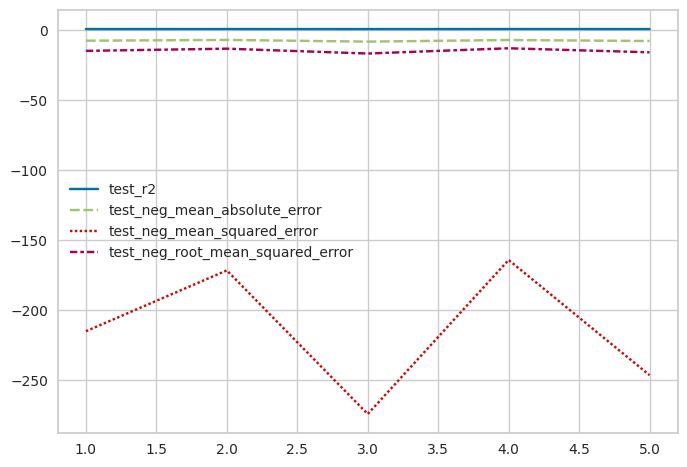

In [128]:
sns.lineplot(data = scores.iloc[:, 2:])
plt.show()

In [129]:
ridge_model.coef_

array([-22.7079106 ,  31.29749414,  -7.55217152,  22.43864679,
       -41.81168169,  40.7452105 ,  30.24710958,  37.60515482,
        37.60390976,  32.32394189,  28.4839556 ,  34.64614661,
        19.29164414,  22.3347314 , -24.09418514,   8.28086302,
         3.18237488,   8.61574071,   2.88287924,   0.68870235,
         0.72644695,   8.03248993,  -6.43468645,   1.58027118,
       -41.99201439, -41.91006803, -46.1233053 , -25.97959692,
       -54.54637101, -45.19686121,   3.34673054, -45.97692117,
       -62.61818593, -39.03595549, -17.68283511,   8.41820856,
        13.3311179 ,   6.23854496,   7.88626768,   7.5998777 ,
         8.59153261,  16.6352671 ,   3.51242538,  11.96267852,
       -10.57808874, -19.31602287,  -5.18730893, -13.20637466,
       -21.72501736,   4.54293356,   6.95558573, -23.18466341,
       -19.80004092,  18.5428062 ,   6.17387141,  -6.26699482,
        13.50701688,   0.34121466,  -9.16197922,  26.60675668,
        24.96732496, -12.44521233,  -6.33564529,  45.41

In [130]:
rm_df = pd.DataFrame(ridge_model.coef_, columns=['ridge_coef_1'])

In [131]:
pd.concat([lm_df, rm_df], axis=1)

,lm_coef,ridge_coef_1
0,-1.859356e+01,-22.707911
1,2.393937e+03,31.297494
2,-1.176129e+03,-7.552172
3,-1.468246e+03,22.438647
4,2.595150e+02,-41.811682
...,...,...
64,6.940802e+05,65.807685
65,1.267393e+06,3.082865
66,-3.625542e+06,-19.817394
67,-7.970261e+06,2.297187


## Choosing best alpha value with Cross Validation (CV)(Ridge)

In [132]:
from sklearn.linear_model import RidgeCV

In [133]:
alpha_space = np.linspace(0.1, 1.0, 500)
alpha_space

array([0.1       , 0.10180361, 0.10360721, 0.10541082, 0.10721443,
       0.10901804, 0.11082164, 0.11262525, 0.11442886, 0.11623246,
       0.11803607, 0.11983968, 0.12164329, 0.12344689, 0.1252505 ,
       0.12705411, 0.12885772, 0.13066132, 0.13246493, 0.13426854,
       0.13607214, 0.13787575, 0.13967936, 0.14148297, 0.14328657,
       0.14509018, 0.14689379, 0.14869739, 0.150501  , 0.15230461,
       0.15410822, 0.15591182, 0.15771543, 0.15951904, 0.16132265,
       0.16312625, 0.16492986, 0.16673347, 0.16853707, 0.17034068,
       0.17214429, 0.1739479 , 0.1757515 , 0.17755511, 0.17935872,
       0.18116232, 0.18296593, 0.18476954, 0.18657315, 0.18837675,
       0.19018036, 0.19198397, 0.19378758, 0.19559118, 0.19739479,
       0.1991984 , 0.201002  , 0.20280561, 0.20460922, 0.20641283,
       0.20821643, 0.21002004, 0.21182365, 0.21362725, 0.21543086,
       0.21723447, 0.21903808, 0.22084168, 0.22264529, 0.2244489 ,
       0.22625251, 0.22805611, 0.22985972, 0.23166333, 0.23346

In [134]:
ridge_cv_model = RidgeCV()

In [135]:
ridge_cv_model = RidgeCV(alphas = alpha_space, cv= 10, scoring = "neg_root_mean_squared_error")

In [136]:
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([0.1       , 0.10180361, 0.10360721, 0.10541082, 0.10721443,
       0.10901804, 0.11082164, 0.11262525, 0.11442886, 0.11623246,
       0.11803607, 0.11983968, 0.12164329, 0.12344689, 0.1252505 ,
       0.12705411, 0.12885772, 0.13066132, 0.13246493, 0.13426854,
       0.13607214, 0.13787575, 0.13967936, 0.14148297, 0.14328657,
       0.14509018, 0.14689379, 0.14869739, 0.150501  , 0.15230461,
       0.154108...
       0.94769539, 0.949499  , 0.95130261, 0.95310621, 0.95490982,
       0.95671343, 0.95851703, 0.96032064, 0.96212425, 0.96392786,
       0.96573146, 0.96753507, 0.96933868, 0.97114228, 0.97294589,
       0.9747495 , 0.97655311, 0.97835671, 0.98016032, 0.98196393,
       0.98376754, 0.98557114, 0.98737475, 0.98917836, 0.99098196,
       0.99278557, 0.99458918, 0.99639279, 0.99819639, 1.        ]),
        cv=10, scoring='neg_root_mean_squared_error')

In [137]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, 'ridge_cv')
rcs

,ridge_cv_train,ridge_cv_test
R2,0.934100,0.927045
mae,8.218072,8.593471
mse,226.810620,246.419017
rmse,15.060233,15.697739


In [138]:
ridge_cv_model.alpha_

0.1

In [139]:
ridge_cv_model.best_score_

-14.749520321652946

In [140]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [141]:
ridge_cv_model.coef_

array([  -3.64081497,  -10.41277986,  -64.53578933,  -23.34544724,
        -90.27323042,   36.22889821,   22.70902005,   24.27413366,
        131.08162282,  130.28649796,   96.93492773,   72.5589865 ,
        138.01712047,   43.41917536,   31.06293708,   -1.56958157,
        -44.19395867,   20.13531589,   28.11465137,   19.1308764 ,
         25.36952911,   -5.38266767,   31.76380694,   14.80812351,
        -77.84550006,  -78.95714126,  -92.69144855,  -71.69361431,
        -90.49540527, -108.53299188,  -70.47956647,  -71.52125809,
       -107.82422895, -122.74534163,   -8.37895831,  -25.53469936,
        -15.31985428,  -21.51371999,   21.71306676,   47.86756304,
         17.12292892,   66.067859  ,   52.94604459,    6.62496198,
        -35.19610975,  -44.86596605,  -22.48650957,  -35.51519222,
        -36.28097764,   -8.18937657,  -13.56553064,  -27.55366397,
        -27.97887047,    8.65576919,    7.46641617,  -22.65525223,
         25.99099747,   -4.4713443 ,  -24.47349704,   55.34744

In [142]:
pd.concat([ls, rs, rcs], axis=1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
R2,0.944211,0.935616,0.934100,0.927045,0.934100,0.927045
mae,6.897777,7.435432,8.218072,8.593471,8.218072,8.593471
mse,192.008604,217.468791,226.810620,246.419017,226.810620,246.419017
rmse,13.856717,14.746823,15.060233,15.697739,15.060233,15.697739


In [143]:
rcm_df = pd.DataFrame(ridge_cv_model.coef_, columns = ["ridge_cv_model.coef_0.02"])

In [144]:
pd.concat([lm_df, rm_df, rcm_df], axis=1)

,lm_coef,ridge_coef_1,ridge_cv_model.coef_0.02
0,-1.859356e+01,-22.707911,-3.640815
1,2.393937e+03,31.297494,-10.412780
2,-1.176129e+03,-7.552172,-64.535789
3,-1.468246e+03,22.438647,-23.345447
4,2.595150e+02,-41.811682,-90.273230
...,...,...,...
64,6.940802e+05,65.807685,138.669427
65,1.267393e+06,3.082865,26.101699
66,-3.625542e+06,-19.817394,-34.463020
67,-7.970261e+06,2.297187,-0.792022


## LASSO

In [145]:
from sklearn.linear_model import Lasso, LassoCV

In [146]:
lasso_model = Lasso(alpha=1.0, random_state = 42)
lasso_model.fit(X_train_scaled, y_train)

Lasso(random_state=42)

In [147]:
y_pred = lasso_model.predict(X_test_scaled)

y_train_pred =lasso_model.predict(X_train_scaled)


In [148]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, 'lasso')
lss

,lasso_train,lasso_test
R2,0.896334,0.890397
mae,11.451003,11.605064
mse,356.788366,370.208189
rmse,18.888842,19.240795


In [149]:
pd.concat([ls, rs, rcs, lss], axis=1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
R2,0.944211,0.935616,0.934100,0.927045,0.934100,0.927045,0.896334,0.890397
mae,6.897777,7.435432,8.218072,8.593471,8.218072,8.593471,11.451003,11.605064
mse,192.008604,217.468791,226.810620,246.419017,226.810620,246.419017,356.788366,370.208189
rmse,13.856717,14.746823,15.060233,15.697739,15.060233,15.697739,18.888842,19.240795


In [150]:
model = Lasso(alpha=1.0, random_state = 42)
scores = cross_validate(model, X_train_scaled, y_train, scoring =['r2',
                                                                  'neg_mean_absolute_error',
                                                                  'neg_mean_squared_error',
                                                                  'neg_root_mean_squared_error',], cv = 5)

In [151]:
pd.DataFrame(scores, index = range(1,6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.164518,0.009860,0.902206,-11.463406,-338.785896,-18.406137
2,0.196755,0.010087,0.896928,-11.184766,-334.633047,-18.292978
3,0.156113,0.010242,0.871516,-12.034419,-426.805793,-20.659279
4,0.233862,0.010175,0.909266,-11.078757,-324.805138,-18.022351
5,0.193182,0.010285,0.896269,-11.657383,-371.429196,-19.272498


In [152]:
scores = pd.DataFrame(scores, index= range(1,6))
scores.iloc[:,2:].mean()

test_r2                               0.895237
test_neg_mean_absolute_error        -11.483746
test_neg_mean_squared_error        -359.291814
test_neg_root_mean_squared_error    -18.930649
dtype: float64

In [153]:
lasso_model.coef_

array([11.25666604, 45.89339017,  5.35444672,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  3.57056876,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -5.48241965, -0.        , -0.        , -0.        , -0.        ,
       -6.58416088, -0.        , -0.        , -0.        ])

In [154]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_alpha_1"])

In [155]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_model.coef_0.02,lasso_coef_alpha_1
0,-1.859356e+01,-22.707911,-3.640815,11.256666
1,2.393937e+03,31.297494,-10.412780,45.893390
2,-1.176129e+03,-7.552172,-64.535789,5.354447
3,-1.468246e+03,22.438647,-23.345447,0.000000
4,2.595150e+02,-41.811682,-90.273230,0.000000
...,...,...,...,...
64,6.940802e+05,65.807685,138.669427,-0.000000
65,1.267393e+06,3.082865,26.101699,-6.584161
66,-3.625542e+06,-19.817394,-34.463020,-0.000000
67,-7.970261e+06,2.297187,-0.792022,-0.000000


## Choosing best alpha value with Cross Validation (CV) (Lasso)

In [156]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5, max_iter=10000, random_state=42)

In [157]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([0.1       , 0.10180361, 0.10360721, 0.10541082, 0.10721443,
       0.10901804, 0.11082164, 0.11262525, 0.11442886, 0.11623246,
       0.11803607, 0.11983968, 0.12164329, 0.12344689, 0.1252505 ,
       0.12705411, 0.12885772, 0.13066132, 0.13246493, 0.13426854,
       0.13607214, 0.13787575, 0.13967936, 0.14148297, 0.14328657,
       0.14509018, 0.14689379, 0.14869739, 0.150501  , 0.15230461,
       0.154108...
       0.94769539, 0.949499  , 0.95130261, 0.95310621, 0.95490982,
       0.95671343, 0.95851703, 0.96032064, 0.96212425, 0.96392786,
       0.96573146, 0.96753507, 0.96933868, 0.97114228, 0.97294589,
       0.9747495 , 0.97655311, 0.97835671, 0.98016032, 0.98196393,
       0.98376754, 0.98557114, 0.98737475, 0.98917836, 0.99098196,
       0.99278557, 0.99458918, 0.99639279, 0.99819639, 1.        ]),
        cv=5, max_iter=10000, random_state=42)

In [158]:
lasso_cv_model.alpha_

0.1

In [159]:
best_alpha = lasso_cv_model.alpha_

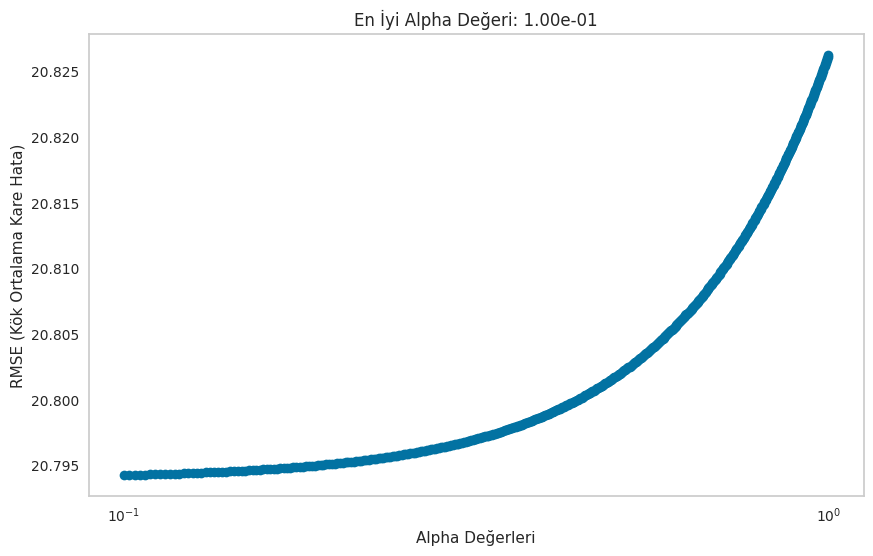

In [160]:
rmse_values = []
for alpha in alpha_space:
    lasso_model = Lasso(alpha=alpha, max_iter=100000, random_state=42)
    lasso_model.fit(X, y)
    y_pred = lasso_model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    rmse_values.append(rmse)
# Alpha değerlerini ve RMSE değerlerini görselleştirin
plt.figure(figsize=(10, 6))
plt.plot(alpha_space, rmse_values, marker='o')
plt.xscale('log')  # X eksenini logaritmik ölçekte ayarlayın
plt.xlabel('Alpha Değerleri')
plt.ylabel('RMSE (Kök Ortalama Kare Hata)')
plt.title(f'En İyi Alpha Değeri: {best_alpha:.2e}')
plt.grid()
plt.show()

In [161]:
y_pred = lasso_cv_model.predict(X_test_scaled)
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [162]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

,lasso_cv_train,lasso_cv_test
R2,0.922665,0.916410
mae,8.739385,9.047634
mse,266.163706,282.343618
rmse,16.314524,16.803084


In [163]:
pd.concat([ls, rs, rcs, lss, lcs], axis=1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
R2,0.944211,0.935616,0.934100,0.927045,0.934100,0.927045,0.896334,0.890397,0.922665,0.916410
mae,6.897777,7.435432,8.218072,8.593471,8.218072,8.593471,11.451003,11.605064,8.739385,9.047634
mse,192.008604,217.468791,226.810620,246.419017,226.810620,246.419017,356.788366,370.208189,266.163706,282.343618
rmse,13.856717,14.746823,15.060233,15.697739,15.060233,15.697739,18.888842,19.240795,16.314524,16.803084


In [164]:
lasso_cv_model.coef_

array([  1.07176906,  66.72820829,  14.52397051,  13.2322331 ,
        -0.        ,   0.        ,   0.        ,   0.        ,
        -0.        ,  -0.        ,  -0.        ,   0.        ,
        -0.        ,  -0.        ,  -0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
        -0.        ,  -0.        , -34.25027323,  -0.        ,
        -0.        ,  -0.        ,  -0.        ,  -0.        ,
       -63.97074602,  -0.        ,  -6.30342243,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.43432733,   0.        ,   0.43332611,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,  11.84259094,   0.        ,
         0.        ,  50.23121036,   0.        ,   0.        ,
         0.        ,   0.        ,  -0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.  

In [165]:
lcm_df = pd.DataFrame(lasso_cv_model.coef_, columns=["lasso_cv_coef_0.01"])

In [166]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df], axis=1)

,lm_coef,ridge_coef_1,ridge_cv_model.coef_0.02,lasso_coef_alpha_1,lasso_cv_coef_0.01
0,-1.859356e+01,-22.707911,-3.640815,11.256666,1.071769
1,2.393937e+03,31.297494,-10.412780,45.893390,66.728208
2,-1.176129e+03,-7.552172,-64.535789,5.354447,14.523971
3,-1.468246e+03,22.438647,-23.345447,0.000000,13.232233
4,2.595150e+02,-41.811682,-90.273230,0.000000,-0.000000
...,...,...,...,...,...
64,6.940802e+05,65.807685,138.669427,-0.000000,0.000000
65,1.267393e+06,3.082865,26.101699,-6.584161,0.000000
66,-3.625542e+06,-19.817394,-34.463020,-0.000000,-0.000000
67,-7.970261e+06,2.297187,-0.792022,-0.000000,0.000000


## Elastic_Net

In [167]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [168]:
elastic_model = ElasticNet(alpha=1.0, l1_ratio = 0.5, random_state= 42)

In [169]:
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(random_state=42)

In [170]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [171]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

,elastic_train,elastic_test
R2,0.869073,0.862648
mae,14.953967,15.172162
mse,450.614945,463.936019
rmse,21.227693,21.539174


## For Elastic_Net CV with Default alpha = 1 and l1_ratio = 0.5

In [172]:
model = Lasso(alpha=1.0, random_state = 42)
scores = cross_validate(model, X_train_scaled, y_train, scoring =['r2',
                                                                  'neg_mean_absolute_error',
                                                                  'neg_mean_squared_error',
                                                                  'neg_root_mean_squared_error',], cv = 5)

In [173]:
scores = pd.DataFrame(scores, index = range(1,6))
scores.iloc[:,2:].mean()

test_r2                               0.895237
test_neg_mean_absolute_error        -11.483746
test_neg_mean_squared_error        -359.291814
test_neg_root_mean_squared_error    -18.930649
dtype: float64

In [174]:
train_val(y_train, y_train_pred, y_test, y_pred, 'elastic')

,elastic_train,elastic_test
R2,0.869073,0.862648
mae,14.953967,15.172162
mse,450.614945,463.936019
rmse,21.227693,21.539174


In [175]:
elastic_model.coef_

array([ 4.11364199,  6.98328917,  6.47155706,  7.08828483,  2.19249326,
        3.21983553,  3.16469693,  3.22846631,  3.09062417,  2.99387652,
        3.12014324,  2.84043199,  3.05573162,  3.13559809,  0.74529919,
        1.24666969,  1.22471399,  1.25646119,  0.94842343,  0.885683  ,
        0.98297301,  0.82918033,  0.91900916,  1.01981922,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.14247352,  0.10214539,  0.16500691,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        , -0.85051259,
       -0.99168257, -0.76202726, -1.08779344, -0.92786558, -0.66064271,
       -1.13955504, -1.05037394, -0.85148053, -0.54812664, -1.1492243 ,
       -1.12913732, -1.00058253, -0.7629868 , -0.42473213])

In [176]:
em_df = pd.DataFrame(elastic_model.coef_, columns= ['elastic_coef_(apl:1) 11:0.5'])

In [177]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df], axis=1)

,lm_coef,ridge_coef_1,ridge_cv_model.coef_0.02,lasso_coef_alpha_1,lasso_cv_coef_0.01,elastic_coef_(apl:1) 11:0.5
0,-1.859356e+01,-22.707911,-3.640815,11.256666,1.071769,4.113642
1,2.393937e+03,31.297494,-10.412780,45.893390,66.728208,6.983289
2,-1.176129e+03,-7.552172,-64.535789,5.354447,14.523971,6.471557
3,-1.468246e+03,22.438647,-23.345447,0.000000,13.232233,7.088285
4,2.595150e+02,-41.811682,-90.273230,0.000000,-0.000000,2.192493
...,...,...,...,...,...,...
64,6.940802e+05,65.807685,138.669427,-0.000000,0.000000,-1.149224
65,1.267393e+06,3.082865,26.101699,-6.584161,0.000000,-1.129137
66,-3.625542e+06,-19.817394,-34.463020,-0.000000,-0.000000,-1.000583
67,-7.970261e+06,2.297187,-0.792022,-0.000000,0.000000,-0.762987


## Choosing best alpha and l1_ratio values with Cross-Validation (Elastic)

In [178]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, 
                                l1_ratio = [0.1, 0.5, 0.7, 0.9, 0.95, 1],
                               cv = 5, max_iter = 10000, random_state = 42)

In [179]:
elastic_cv_model.fit(X_train_scaled, y_train)

ElasticNetCV(alphas=array([0.1       , 0.10180361, 0.10360721, 0.10541082, 0.10721443,
       0.10901804, 0.11082164, 0.11262525, 0.11442886, 0.11623246,
       0.11803607, 0.11983968, 0.12164329, 0.12344689, 0.1252505 ,
       0.12705411, 0.12885772, 0.13066132, 0.13246493, 0.13426854,
       0.13607214, 0.13787575, 0.13967936, 0.14148297, 0.14328657,
       0.14509018, 0.14689379, 0.14869739, 0.150501  , 0.15230461,
       0.1...
       0.94769539, 0.949499  , 0.95130261, 0.95310621, 0.95490982,
       0.95671343, 0.95851703, 0.96032064, 0.96212425, 0.96392786,
       0.96573146, 0.96753507, 0.96933868, 0.97114228, 0.97294589,
       0.9747495 , 0.97655311, 0.97835671, 0.98016032, 0.98196393,
       0.98376754, 0.98557114, 0.98737475, 0.98917836, 0.99098196,
       0.99278557, 0.99458918, 0.99639279, 0.99819639, 1.        ]),
             cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=10000,
             random_state=42)

In [180]:
elastic_cv_model.alpha_

0.1

In [181]:
elastic_cv_model.l1_ratio_

1.0

In [182]:
y_pred = elastic_cv_model.predict(X_test_scaled)
y_train_pred = elastic_cv_model.predict(X_train_scaled)

In [183]:
ecs = train_val(y_train, y_train_pred, y_test, y_pred, 'elastic_cv')
ecs

,elastic_cv_train,elastic_cv_test
R2,0.922665,0.916410
mae,8.739385,9.047634
mse,266.163706,282.343618
rmse,16.314524,16.803084


In [184]:
pd.concat([ls, rs, rcs, lss, lcs, es, ecs], axis=1)


,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_cv_train,elastic_cv_test
R2,0.944211,0.935616,0.934100,0.927045,0.934100,0.927045,0.896334,0.890397,0.922665,0.916410,0.869073,0.862648,0.922665,0.916410
mae,6.897777,7.435432,8.218072,8.593471,8.218072,8.593471,11.451003,11.605064,8.739385,9.047634,14.953967,15.172162,8.739385,9.047634
mse,192.008604,217.468791,226.810620,246.419017,226.810620,246.419017,356.788366,370.208189,266.163706,282.343618,450.614945,463.936019,266.163706,282.343618
rmse,13.856717,14.746823,15.060233,15.697739,15.060233,15.697739,18.888842,19.240795,16.314524,16.803084,21.227693,21.539174,16.314524,16.803084


In [185]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [186]:
elastic_model = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state = 42)
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(random_state=42)

In [187]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [188]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

,elastic_train,elastic_test
R2,0.869073,0.862648
mae,14.953967,15.172162
mse,450.614945,463.936019
rmse,21.227693,21.539174


In [189]:
pd.concat([ls, rs, rcs, lss, lcs, es], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
R2,0.944211,0.935616,0.934100,0.927045,0.934100,0.927045,0.896334,0.890397,0.922665,0.916410,0.869073,0.862648
mae,6.897777,7.435432,8.218072,8.593471,8.218072,8.593471,11.451003,11.605064,8.739385,9.047634,14.953967,15.172162
mse,192.008604,217.468791,226.810620,246.419017,226.810620,246.419017,356.788366,370.208189,266.163706,282.343618,450.614945,463.936019
rmse,13.856717,14.746823,15.060233,15.697739,15.060233,15.697739,18.888842,19.240795,16.314524,16.803084,21.227693,21.539174


## For Elastic_Net CV with Deafult alpha=1 and l1_ratio = 0.5

In [190]:
model = ElasticNet(alpha=1, l1_ratio=0.5, random_state = 42)
scores = cross_validate(model, X_train_scaled, y_train, scoring =['r2',
                                                                  'neg_mean_absolute_error',
                                                                  'neg_mean_squared_error',
                                                                  'neg_root_mean_squared_error',], cv = 5)

In [191]:
scores = pd.DataFrame(scores, index = range(1,6))
scores.iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.868690,-15.117869,-454.894859,-21.328264
2,0.864669,-14.918044,-439.363381,-20.960997
3,0.847565,-15.315907,-506.366425,-22.502587
4,0.884576,-14.605775,-413.188512,-20.327039
5,0.874159,-14.969131,-450.599024,-21.227318


In [192]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                               0.867932
test_neg_mean_absolute_error        -14.985345
test_neg_mean_squared_error        -452.882440
test_neg_root_mean_squared_error    -21.269241
dtype: float64

In [193]:
train_val(y_train, y_train_pred, y_test, y_pred, "elastic")

,elastic_train,elastic_test
R2,0.869073,0.862648
mae,14.953967,15.172162
mse,450.614945,463.936019
rmse,21.227693,21.539174


In [194]:
elastic_model.coef_

array([ 4.11364199,  6.98328917,  6.47155706,  7.08828483,  2.19249326,
        3.21983553,  3.16469693,  3.22846631,  3.09062417,  2.99387652,
        3.12014324,  2.84043199,  3.05573162,  3.13559809,  0.74529919,
        1.24666969,  1.22471399,  1.25646119,  0.94842343,  0.885683  ,
        0.98297301,  0.82918033,  0.91900916,  1.01981922,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.14247352,  0.10214539,  0.16500691,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        , -0.85051259,
       -0.99168257, -0.76202726, -1.08779344, -0.92786558, -0.66064271,
       -1.13955504, -1.05037394, -0.85148053, -0.54812664, -1.1492243 ,
       -1.12913732, -1.00058253, -0.7629868 , -0.42473213])

In [195]:
em_df = pd.DataFrame(elastic_model.coef_, columns = ["elastic_coef_(apl:1) l1:0.5"])

In [196]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_model.coef_0.02,lasso_coef_alpha_1,lasso_cv_coef_0.01,elastic_coef_(apl:1) l1:0.5
0,-1.859356e+01,-22.707911,-3.640815,11.256666,1.071769,4.113642
1,2.393937e+03,31.297494,-10.412780,45.893390,66.728208,6.983289
2,-1.176129e+03,-7.552172,-64.535789,5.354447,14.523971,6.471557
3,-1.468246e+03,22.438647,-23.345447,0.000000,13.232233,7.088285
4,2.595150e+02,-41.811682,-90.273230,0.000000,-0.000000,2.192493
...,...,...,...,...,...,...
64,6.940802e+05,65.807685,138.669427,-0.000000,0.000000,-1.149224
65,1.267393e+06,3.082865,26.101699,-6.584161,0.000000,-1.129137
66,-3.625542e+06,-19.817394,-34.463020,-0.000000,-0.000000,-1.000583
67,-7.970261e+06,2.297187,-0.792022,-0.000000,0.000000,-0.762987


## Choosing best alpha and l1_ratio values with Cross-Validation (Elastic)

In [197]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space,
                                l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1],
                                cv = 5, max_iter = 100000, random_state = 42)

In [198]:
elastic_cv_model.fit(X_train_scaled, y_train)

ElasticNetCV(alphas=array([0.1       , 0.10180361, 0.10360721, 0.10541082, 0.10721443,
       0.10901804, 0.11082164, 0.11262525, 0.11442886, 0.11623246,
       0.11803607, 0.11983968, 0.12164329, 0.12344689, 0.1252505 ,
       0.12705411, 0.12885772, 0.13066132, 0.13246493, 0.13426854,
       0.13607214, 0.13787575, 0.13967936, 0.14148297, 0.14328657,
       0.14509018, 0.14689379, 0.14869739, 0.150501  , 0.15230461,
       0.1...
       0.94769539, 0.949499  , 0.95130261, 0.95310621, 0.95490982,
       0.95671343, 0.95851703, 0.96032064, 0.96212425, 0.96392786,
       0.96573146, 0.96753507, 0.96933868, 0.97114228, 0.97294589,
       0.9747495 , 0.97655311, 0.97835671, 0.98016032, 0.98196393,
       0.98376754, 0.98557114, 0.98737475, 0.98917836, 0.99098196,
       0.99278557, 0.99458918, 0.99639279, 0.99819639, 1.        ]),
             cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000,
             random_state=42)

In [199]:
elastic_cv_model.alpha_

0.1

In [200]:
elastic_cv_model.l1_ratio_

1.0

In [201]:
y_pred = elastic_cv_model.predict(X_test_scaled)
y_train_pred = elastic_cv_model.predict(X_train_scaled)

In [202]:
ecs = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_cv")
ecs

,elastic_cv_train,elastic_cv_test
R2,0.922681,0.916380
mae,8.729477,9.041726
mse,266.110467,282.444503
rmse,16.312893,16.806085


In [203]:
pd.concat([ls, rs, rcs, lss, lcs, es, ecs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_cv_train,elastic_cv_test
R2,0.944211,0.935616,0.934100,0.927045,0.934100,0.927045,0.896334,0.890397,0.922665,0.916410,0.869073,0.862648,0.922681,0.916380
mae,6.897777,7.435432,8.218072,8.593471,8.218072,8.593471,11.451003,11.605064,8.739385,9.047634,14.953967,15.172162,8.729477,9.041726
mse,192.008604,217.468791,226.810620,246.419017,226.810620,246.419017,356.788366,370.208189,266.163706,282.343618,450.614945,463.936019,266.110467,282.444503
rmse,13.856717,14.746823,15.060233,15.697739,15.060233,15.697739,18.888842,19.240795,16.314524,16.803084,21.227693,21.539174,16.312893,16.806085


In [204]:
elastic_cv_model.coef_

array([  0.97977419,  54.28945122,  19.17114129,  21.15585072,
        -0.        ,   0.        ,   0.        ,   0.        ,
        -0.        ,  -0.        ,  -0.        ,   0.        ,
        -0.        ,  -0.        ,  -0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
        -0.        ,  -0.        , -16.69813829,  -0.        ,
        -0.        ,  -0.        ,  -0.        ,  -0.        ,
       -81.16417399,  -0.        ,  -6.20924277,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.81548775,   0.        ,   0.1527222 ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,  12.953503  ,   0.        ,
         0.        ,  48.65270578,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.  

In [205]:
ecm_df = pd.DataFrame(elastic_cv_model.coef_, columns=["elastic_coef_(alp:0.01, l1:1)"])

In [206]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df, ecm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_model.coef_0.02,lasso_coef_alpha_1,lasso_cv_coef_0.01,elastic_coef_(apl:1) l1:0.5,"elastic_coef_(alp:0.01, l1:1)"
0,-1.859356e+01,-22.707911,-3.640815,11.256666,1.071769,4.113642,0.979774
1,2.393937e+03,31.297494,-10.412780,45.893390,66.728208,6.983289,54.289451
2,-1.176129e+03,-7.552172,-64.535789,5.354447,14.523971,6.471557,19.171141
3,-1.468246e+03,22.438647,-23.345447,0.000000,13.232233,7.088285,21.155851
4,2.595150e+02,-41.811682,-90.273230,0.000000,-0.000000,2.192493,-0.000000
...,...,...,...,...,...,...,...
64,6.940802e+05,65.807685,138.669427,-0.000000,0.000000,-1.149224,0.000000
65,1.267393e+06,3.082865,26.101699,-6.584161,0.000000,-1.129137,0.000000
66,-3.625542e+06,-19.817394,-34.463020,-0.000000,-0.000000,-1.000583,-0.000000
67,-7.970261e+06,2.297187,-0.792022,-0.000000,0.000000,-0.762987,0.000000


## Grid Search

In [207]:
from sklearn.model_selection import GridSearchCV

In [208]:
elastic_model = ElasticNet(max_iter = 10000, random_state = 42)

In [209]:
param_grid = {"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
             "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [210]:
param_grid = {"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
             "l1_ratio":[0.1, 0.2, 0.3, 0.4, 0.5, 1]}

In [211]:
grid_model = GridSearchCV(estimator= elastic_model,
                          param_grid = param_grid,
                          scoring = "neg_root_mean_squared_error",
                          cv = 10, verbose = 2) # verbose alttaki raporu verdi

In [212]:
grid_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 42 candidates, totalling 420 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   2.9s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   2.9s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   2.9s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   3.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   2.9s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   2.9s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   2.9s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   2.9s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   2.9s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   2.9s
[CV] END ...........................alpha=0.01, l1_ratio=0.2; total time=   3.0s
[CV] END ...........................alpha=0.01

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=10000, random_state=42),
             param_grid={'alpha': [0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [213]:
grid_model.best_params_

{'alpha': 0.01, 'l1_ratio': 1}

In [214]:
grid_model.best_index_

5

In [215]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,2.915897,0.030407,0.002492,0.001764,0.01,0.1,"{'alpha': 0.01, 'l1_ratio': 0.1}",-15.361187,-17.420163,-16.503920,-15.288034,-19.445641,-17.746885,-15.414985,-14.693004,-16.409028,-17.132538,-16.541539,1.366661,10
1,2.947568,0.059064,0.001914,0.000086,0.01,0.2,"{'alpha': 0.01, 'l1_ratio': 0.2}",-15.173626,-17.302653,-16.360947,-15.047290,-19.363135,-17.595895,-15.262426,-14.547144,-16.297777,-17.001456,-16.395235,1.394976,8
2,2.954885,0.042486,0.001873,0.000130,0.01,0.3,"{'alpha': 0.01, 'l1_ratio': 0.3}",-15.101491,-17.257507,-16.317263,-14.950651,-19.342627,-17.508772,-15.175845,-14.468561,-16.291024,-16.974879,-16.338862,1.412492,6
3,2.805611,0.032098,0.004087,0.004777,0.01,0.4,"{'alpha': 0.01, 'l1_ratio': 0.4}",-15.114779,-17.269543,-16.290645,-14.995632,-19.319903,-17.501373,-15.160843,-14.461244,-16.281360,-16.992354,-16.338767,1.405443,5
4,2.768960,0.027956,0.007036,0.004321,0.01,0.5,"{'alpha': 0.01, 'l1_ratio': 0.5}",-14.998537,-17.184551,-16.127779,-14.867663,-19.222267,-17.420526,-15.067255,-14.385761,-16.137891,-16.890264,-16.230249,1.409352,3
5,2.789180,0.130459,0.007313,0.001782,0.01,1,"{'alpha': 0.01, 'l1_ratio': 1}",-14.293375,-16.376311,-14.959412,-13.329631,-18.480981,-16.095818,-13.912657,-13.654257,-15.427593,-16.520498,-15.305053,1.518581,1
6,3.025182,0.038543,0.004442,0.003106,0.012,0.1,"{'alpha': 0.012, 'l1_ratio': 0.1}",-15.455834,-17.459212,-16.648198,-15.331633,-19.541468,-17.805394,-15.501415,-14.772059,-16.533587,-17.180535,-16.622934,1.365580,12
7,2.919533,0.037864,0.007602,0.003943,0.012,0.2,"{'alpha': 0.012, 'l1_ratio': 0.2}",-15.462137,-17.463077,-16.617501,-15.356225,-19.517281,-17.806161,-15.488335,-14.760177,-16.515443,-17.183868,-16.617020,1.360815,11
8,2.883697,0.059775,0.004962,0.003124,0.012,0.3,"{'alpha': 0.012, 'l1_ratio': 0.3}",-15.303952,-17.381858,-16.448724,-15.215665,-19.416889,-17.701955,-15.373402,-14.656777,-16.365672,-17.089623,-16.495452,1.372788,9
9,2.997167,0.068249,0.004406,0.003063,0.012,0.4,"{'alpha': 0.012, 'l1_ratio': 0.4}",-15.114046,-17.263943,-16.310327,-14.966596,-19.338440,-17.540209,-15.206879,-14.497226,-16.269904,-16.964031,-16.347160,1.405293,7


In [216]:
grid_model.best_score_

-15.305053360200352

## Using Best Hyper Parameters From GridSearch

In [217]:
y_pred = grid_model.predict(X_test_scaled)
y_train_pred = grid_model.predict(X_train_scaled)

In [218]:
train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")

,GridSearch_train,GridSearch_test
R2,0.932226,0.925565
mae,8.508544,8.855597
mse,233.257777,251.420256
rmse,15.272779,15.856237


## Final Model

In [219]:
# Orijinal verileri kullanacagiz;  
X = df[['Engine Size(L)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption City (L/100 km)']]
y = df['CO2 Emissions(g/km)']

In [220]:
from sklearn.preprocessing import PolynomialFeatures

In [221]:
#Featurelerimizi 4. dereceden polinom olusturacak sekilde di=onusturelim; 

poly_converter = PolynomialFeatures(degree = 4, include_bias=False)

In [222]:
X = poly_converter.fit_transform(X) 

In [223]:
X.shape

(7385, 69)

In [224]:
y.shape

(7385,)

In [225]:
from sklearn.linear_model import LinearRegression

In [226]:
final_model = LinearRegression()

In [227]:
final_model.fit(X, y)

LinearRegression()

In [228]:
final_model.intercept_

283.5375898678234

In [229]:
final_model.coef_ 

array([-1.57997031e+01,  7.41023240e+02, -4.71866777e+02, -3.77616496e+02,
        3.50931221e+01, -1.72267877e+02,  9.05212091e+01,  6.86368718e+01,
        1.26972364e+03, -1.33492619e+03, -1.38581639e+03,  3.65553467e+02,
        7.26594996e+02,  3.81792744e+02,  1.08668101e+01, -1.26331274e+02,
        5.22415300e+01,  5.77768745e+01,  2.21466298e+03, -2.06925808e+03,
       -2.28031554e+03,  4.89819179e+02,  1.05742462e+03,  5.93533561e+02,
        4.54652052e+03, -7.25191470e+03, -7.28249436e+03,  3.70677818e+03,
        7.91078533e+03,  3.81640224e+03, -6.13039860e+02, -2.06010124e+03,
       -2.11971358e+03, -6.55235331e+02,  4.62856390e-01, -5.87442807e+00,
        2.42450665e+00,  2.18151756e+00,  6.96343170e+01, -5.08022565e+01,
       -7.05961573e+01,  8.74349911e+00,  2.57044421e+01,  1.84339995e+01,
        7.58960797e+02, -1.11572616e+03, -1.37425792e+03,  5.64716202e+02,
        1.30501469e+03,  8.26762589e+02, -9.77535264e+01, -3.20523586e+02,
       -3.81898107e+02, -

In [230]:
y_pred_final = final_model.predict(X)
y_pred_final

array([199.91663921, 225.33429182, 130.16650085, ..., 234.25944794,
       228.55495519, 237.31888895])

In [231]:
my_dict = {"Actual": y, "pred": y_pred_final, "residual": y - y_pred_final}
compare = pd.DataFrame(my_dict)
compare.head(20)

,Actual,pred,residual
0,196,199.916639,-3.916639
1,221,225.334292,-4.334292
2,136,130.166501,5.833499
3,255,261.835898,-6.835898
4,244,249.841380,-5.841380
5,230,233.489764,-3.489764
6,232,237.043465,-5.043465
7,255,260.895549,-5.895549
8,267,274.004134,-7.004134
9,212,216.739511,-4.739511


In [232]:
# Bu tahminin basarisini olcmek icin; 

def eval_metric(Actual, pred):
    mae = mean_absolute_error(Actual, pred)
    mse = mean_squared_error(Actual, pred)
    rmse = np.sqrt(mean_squared_error(Actual, pred))
    R2_score = r2_score(Actual, pred)
    #print("Model testing performance: ")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [233]:
print("Model testing performance: ")
eval_metric(compare.Actual, compare.pred)

Model testing performance: 
--------------------------
R2_score 	: 0.9421697451168296
MAE 		: 7.122823382764405
MSE 		: 197.9685791472335
RMSE 		: 14.070130743786054


## Prediction

In [234]:
engine_size = 6
fuel_cons_city = 18
fuel_cons_hwy = 11
fuel_cons_comb = 15

# olan aracin CO2 emisyonunu bulunuz.

X = np.array([[engine_size, fuel_cons_city, fuel_cons_hwy, fuel_cons_comb]])
from sklearn.preprocessing import PolynomialFeatures
poly_converter = PolynomialFeatures(degree = 4, include_bias=False)
X = poly_converter.fit_transform(X)
CO2 = final_model.predict(X)
CO2 = np.squeeze(CO2).round(1)

print("Bu aracin CO2 salinimi %94 olasilikla", CO2, "g/Km civarindadir.")

Bu aracin CO2 salinimi %94 olasilikla -920236.7 g/Km civarindadir.
